In [40]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\ssuni\OneDrive\Desktop\sunilkumar\Capstone project\Originaldata.xlsx'


In [41]:
data = pd.read_excel(file_path)

Question: What factors determine whether a service is excluded from the in-network and out-of-network MOOP limits? Can we predict MOOP exclusions using machine learning?

In [ ]:
part-1 target = 'IsExclFromInnMOOP'

In [3]:

new_df = data


new_df['IsExclFromInnMOOP'] = new_df['IsExclFromInnMOOP'].map({'Yes': 1, 'No': 0})

# Step 2: Select relevant features and target
features = [
    'BenefitName', 'CopayInnTier1', 'CoinsInnTier1', 'IsEHB', 
    'Exclusions', 'LimitQty'
]
target = 'IsExclFromInnMOOP'

# Create a subset of the data
new_df_subset = new_df[features + [target]]

# Step 3: Handle missing values
# Replace NaN in numerical columns with median
numerical_columns = ['LimitQty']
for col in numerical_columns:
    new_df_subset[col].fillna(new_df_subset[col].median(), inplace=True)

# Replace NaN in categorical columns with "Unknown"
categorical_columns = ['BenefitName', 'CopayInnTier1', 'CoinsInnTier1', 'IsEHB', 'Exclusions']
for col in categorical_columns:
    new_df_subset[col].fillna('Unknown', inplace=True)

# Step 4: Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df_subset, columns=categorical_columns, drop_first=True)

# Drop rows with missing target values
new_df_encoded = new_df_encoded.dropna(subset=[target])

# Step 5: Split the data into features (X) and target (y)
X_new = new_df_encoded.drop(columns=[target])
y_new = new_df_encoded[target]

# Display the shapes of the processed features and target
X_new.shape, y_new.shape


C:\Users\ssuni\AppData\Local\Temp\ipykernel_30160\1214972784.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subset[col].fillna(new_df_subset[col].median(), inplace=True)
C:\Users\ssuni\AppData\Local\Temp\ipykernel_30160\1214972784.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subset[col].fillna('Unknown', inplace=True)


((871459, 871), (871459,))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)


In [6]:

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics and confusion matrix
accuracy, precision, recall, f1, conf_matrix


(0.9978943382369816,
 0.9388736263736264,
 0.8310030395136778,
 0.8816510802966785,
 array([[172558,     89],
        [   278,   1367]], dtype=int64))

Accuracy: 99.79%
Precision: 93.89%
Recall: 83.10%
F1-Score: 88.17%

Accuracy: The model predicts the correct outcome in nearly all cases (99.79%).
Precision: High precision (93.89%) indicates that most of the predicted exclusions were indeed exclusions.
Recall: While strong (83.10%), there is room to improve the recall to identify more actual exclusions.
F1-Score: Balances precision and recall effectively, reflecting robust model performance.


Threshold Adjustment Results:
Threshold: 0.30, Accuracy: 0.6823, Precision: 0.5320, Recall: 0.8714, F1-Score: 0.6607
Threshold: 0.40, Accuracy: 0.7579, Precision: 0.6752, Recall: 0.6127, F1-Score: 0.6424
Threshold: 0.50, Accuracy: 0.7685, Precision: 0.7702, Recall: 0.4960, F1-Score: 0.6034
Threshold: 0.60, Accuracy: 0.7640, Precision: 0.8598, Recall: 0.4004, F1-Score: 0.5463
Threshold: 0.70, Accuracy: 0.7560, Precision: 0.9027, Recall: 0.3504, F1-Score: 0.5048


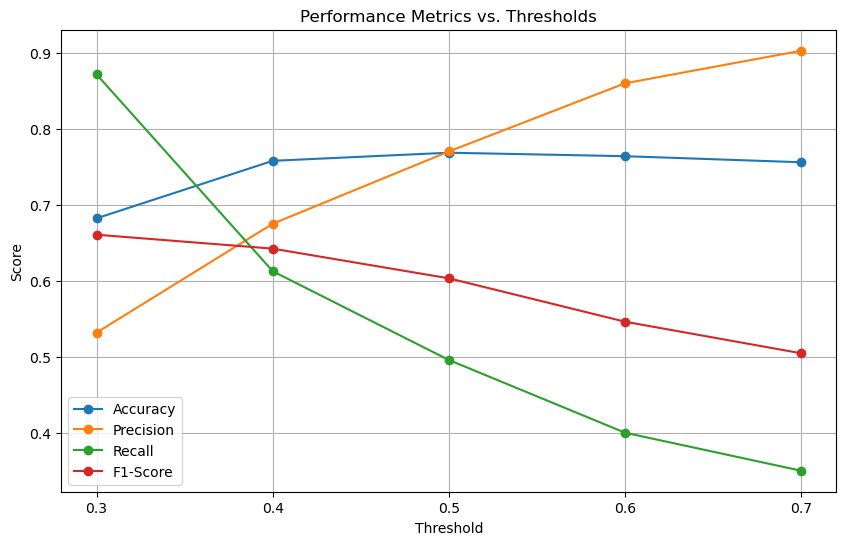

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)  # Ensure the model is fitted

# Step 2: Predict probabilities on the test set
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class

# Step 3: Initialize lists to store results
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Step 4: Test different thresholds and compute metrics
print("Threshold Adjustment Results:")
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print metrics for the current threshold
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Step 5: Visualize metrics across thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')

# Customizing the plot
plt.title('Performance Metrics vs. Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.legend()
plt.grid()
plt.show()


## Analyze Feature Importance

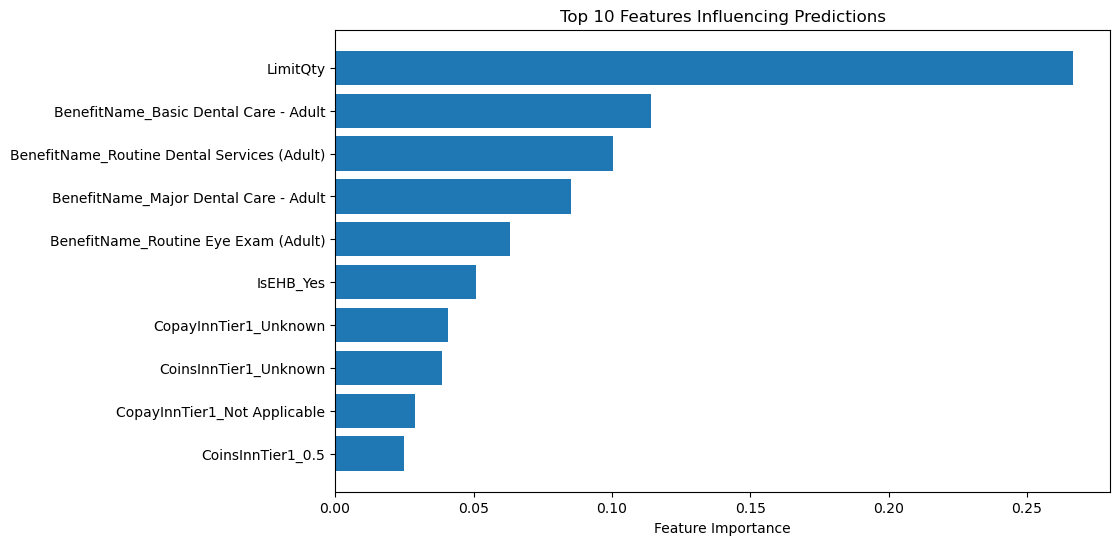

                                         Feature  Importance
0                                       LimitQty    0.266643
11         BenefitName_Basic Dental Care - Adult    0.114251
150  BenefitName_Routine Dental Services (Adult)    0.100340
79         BenefitName_Major Dental Care - Adult    0.085159
151         BenefitName_Routine Eye Exam (Adult)    0.063171
600                                    IsEHB_Yes    0.051056
550                        CopayInnTier1_Unknown    0.040749
599                        CoinsInnTier1_Unknown    0.038603
549                 CopayInnTier1_Not Applicable    0.028780
560                            CoinsInnTier1_0.5    0.024864


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Predictions')
plt.xlabel('Feature Importance')
plt.show()

# Display the top features
print(importance_df.head(10))


LimitQty (26.66%): The quantity limit on services is the most influential factor in determining MOOP exclusions.
Basic Dental Care - Adult (11.43%): Dental care benefits strongly impact MOOP exclusions.
Routine Dental Services (Adult) (10.03%): Routine dental services are crucial for predicting exclusions.
Major Dental Care - Adult (8.52%): Major dental benefits play a significant role.
Routine Eye Exam (Adult) (6.32%): Vision-related benefits are also impactful.
IsEHB_Yes (5.11%): Whether the service is an Essential Health Benefit influences exclusions.
CopayInnTier1_Unknown (4.07%): Missing copayment data is notable.
CoinsInnTier1_Unknown (3.86%): Missing coinsurance tier information is important.
CopayInnTier1_Not Applicable (2.88%): Services labeled "Not Applicable" for copayments are influential.
CoinsInnTier1_0.5 (2.49%): Specific coinsurance rates (0.5%) hold predictive value.

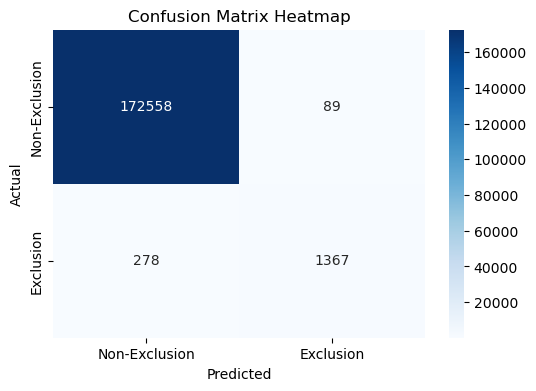

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Exclusion', 'Exclusion'], 
            yticklabels=['Non-Exclusion', 'Exclusion'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


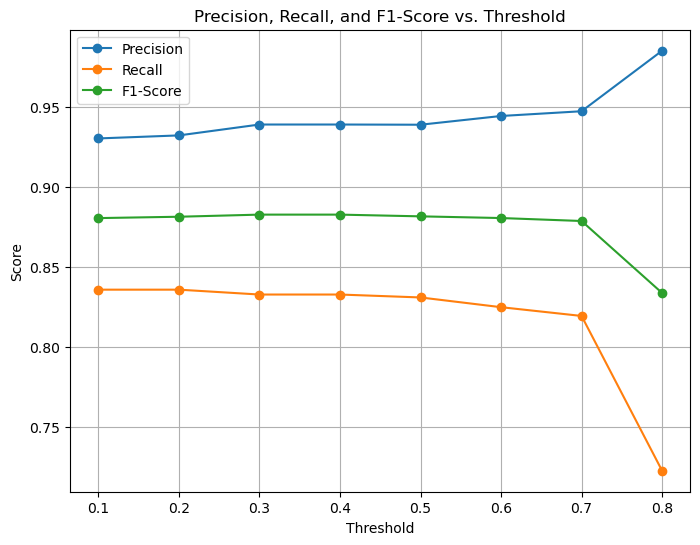

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute predicted probabilities
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Test thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
precisions, recalls, f1_scores = [], [], []

for threshold in thresholds:
    y_pred_threshold = (y_probs_rf >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# Plot precision, recall, and F1-score vs. thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


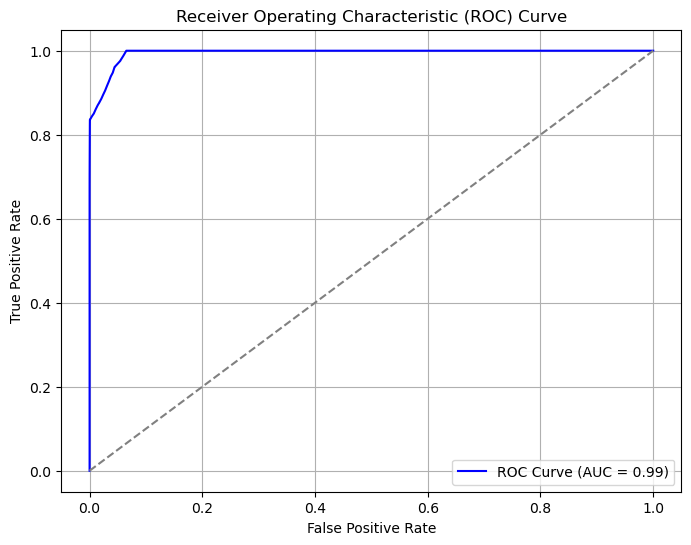

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = roc_auc_score(y_test, y_probs_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


***Feature Engineering

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Resolve Unknown Values
X_train['Exclusions_Unknown_Flag'] = (X_train['Exclusions_Unknown'] == 1).astype(int)
X_test['Exclusions_Unknown_Flag'] = (X_test['Exclusions_Unknown'] == 1).astype(int)
X_train['Exclusions_Unknown'] = X_train['Exclusions_Unknown'].replace(1, 0.5)
X_test['Exclusions_Unknown'] = X_test['Exclusions_Unknown'].replace(1, 0.5)

# Step 2: Create Interaction Terms
X_train['LimitQty_Exclusions'] = X_train['LimitQty'] * X_train['Exclusions_Unknown']
X_test['LimitQty_Exclusions'] = X_test['LimitQty'] * X_test['Exclusions_Unknown']

# Step 3: Aggregate Related Features
benefit_cols = [col for col in X_train.columns if 'BenefitName_' in col]
X_train['Benefit_Sum'] = X_train[benefit_cols].sum(axis=1)
X_test['Benefit_Sum'] = X_test[benefit_cols].sum(axis=1)

exclusion_cols = [col for col in X_train.columns if 'Exclusions_' in col]
X_train['Exclusion_Count'] = X_train[exclusion_cols].sum(axis=1)
X_test['Exclusion_Count'] = X_test[exclusion_cols].sum(axis=1)

# Step 4: Normalize and Bin Numerical Features
scaler = MinMaxScaler()
X_train['LimitQty_Normalized'] = scaler.fit_transform(X_train[['LimitQty']])
X_test['LimitQty_Normalized'] = scaler.transform(X_test[['LimitQty']])

bins = [0, 10, 30, 50, 100]
labels = ['Low', 'Medium', 'High', 'Very High']
X_train['LimitQty_Binned'] = pd.cut(X_train['LimitQty'], bins=bins, labels=labels)
X_test['LimitQty_Binned'] = pd.cut(X_test['LimitQty'], bins=bins, labels=labels)

# Step 5: Encode New Features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align train and test datasets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Step 6: Retrain the Model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Step 7: Evaluate Performance
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation with Feature Engineering:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Model Evaluation with Feature Engineering:
Accuracy: 0.9979, Precision: 0.9389, Recall: 0.8310, F1-Score: 0.8817
Confusion Matrix:
[[172558     89]
 [   278   1367]]


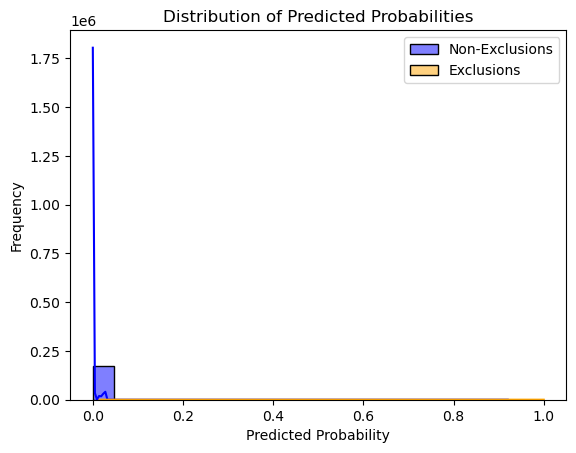

In [38]:
sns.histplot(y_probs_rf[y_test == 0], bins=20, color='blue', label='Non-Exclusions', kde=True)
sns.histplot(y_probs_rf[y_test == 1], bins=20, color='orange', label='Exclusions', kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


###Hyperparameter Tuning

In [12]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Apply PCA to reduce the number of features
pca = PCA(n_components=50, random_state=42)  # Retain 50 components
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV with the full training set
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the full training data
random_search.fit(X_train_reduced, y_train)

# Output the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

# Evaluate the tuned model on the test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best F1 Score: 0.8880047583429854

Model Evaluation:
Accuracy: 0.996953388566314
Precision: 0.9550653594771242
Recall: 0.7106382978723405
F1-Score: 0.8149180899268037
Confusion Matrix:
 [[172592     55]
 [   476   1169]]


Investigate Plans with Restrictive Limits

In [7]:

import pandas as pd

# Add predictions and exclusions to the dataset
test_data = X_test.copy()
test_data['True_Label'] = y_test
test_data['Predicted_Label'] = y_pred

# Analyze `LimitQty` for excluded services
excluded_services = test_data[test_data['True_Label'] == 1]  # True exclusions
excluded_summary = excluded_services['LimitQty'].describe()

print("Summary Statistics for `LimitQty` in Excluded Services:\n", excluded_summary)

# Compare to non-excluded services
non_excluded_services = test_data[test_data['True_Label'] == 0]  # True non-exclusions
non_excluded_summary = non_excluded_services['LimitQty'].describe()

print("Summary Statistics for `LimitQty` in Non-Excluded Services:\n", non_excluded_summary)


Summary Statistics for `LimitQty` in Excluded Services:
 count    1645.000000
mean      409.314894
std       502.276037
min         1.000000
25%        30.000000
50%        30.000000
75%      1000.000000
max      3100.000000
Name: LimitQty, dtype: float64
Summary Statistics for `LimitQty` in Non-Excluded Services:
 count    172647.000000
mean         36.893111
std         654.584508
min           1.000000
25%          30.000000
50%          30.000000
75%          30.000000
max       75000.000000
Name: LimitQty, dtype: float64


Identify Commonly Excluded Services

In [10]:
# Add predictions and exclusions to the dataset
excluded_services = new_df_subset[new_df_subset['IsExclFromInnMOOP'] == 1]  # Services marked as excluded

# Count exclusions by benefit name
excluded_by_benefit = excluded_services['BenefitName'].value_counts()

# Display the top 10 most excluded services
print("Top 10 Commonly Excluded Services:\n")
print(excluded_by_benefit.head(10))


Top 10 Commonly Excluded Services:

Routine Dental Services (Adult)    1868
Basic Dental Care - Adult          1856
Major Dental Care - Adult          1729
Routine Eye Exam (Adult)           1221
Orthodontia - Child                 120
Weight Loss Programs                112
Orthodontia - Adult                  95
Eye Glasses for Adults               92
Fitness Benefit - Adult              92
Infertility Treatment                74
Name: BenefitName, dtype: int64


In [12]:
# Compute baseline exclusion rate
baseline_exclusion_rate = new_df_subset['IsExclFromInnMOOP'].mean() * 100
print(f"Baseline Exclusion Rate: {baseline_exclusion_rate:.2f}%")

# Identify baseline top excluded services
baseline_top_exclusions = new_df_subset[new_df_subset['IsExclFromInnMOOP'] == 1]['BenefitName'].value_counts().head(10)
print("Baseline Top 10 Excluded Services:\n", baseline_top_exclusions)


Baseline Exclusion Rate: 0.94%
Baseline Top 10 Excluded Services:
 Routine Dental Services (Adult)    1868
Basic Dental Care - Adult          1856
Major Dental Care - Adult          1729
Routine Eye Exam (Adult)           1221
Orthodontia - Child                 120
Weight Loss Programs                112
Orthodontia - Adult                  95
Eye Glasses for Adults               92
Fitness Benefit - Adult              92
Infertility Treatment                74
Name: BenefitName, dtype: int64


In [15]:
# Check for NaN or infinite values in Simulated_Exclusion
print(simulated_df['Simulated_Exclusion'].isna().sum())  # Count NaN values
print((simulated_df['Simulated_Exclusion'] == float('inf')).sum())  # Count infinite values


177116
0


In [16]:
# Fill NaN or infinite values with 0 (or another fallback value)
simulated_df['Simulated_Exclusion'].fillna(0, inplace=True)
simulated_df.loc[simulated_df['Simulated_Exclusion'] == float('inf'), 'Simulated_Exclusion'] = 0


In [17]:
# Convert safely to integers
simulated_df['Simulated_Exclusion'] = simulated_df['Simulated_Exclusion'].round().astype(int)


In [18]:
import pandas as pd

# Create a copy of the dataset to simulate changes
simulated_df = new_df_subset.copy()

# Simulate increasing `LimitQty` for services below the median
median_limit_qty = simulated_df['LimitQty'].median()
simulated_df.loc[simulated_df['LimitQty'] < median_limit_qty, 'LimitQty'] = median_limit_qty

# Simulate a 10% reduction in exclusions for these services
simulated_df['Simulated_Exclusion'] = simulated_df['IsExclFromInnMOOP']
reduction_condition = simulated_df['LimitQty'] == median_limit_qty
simulated_df.loc[reduction_condition, 'Simulated_Exclusion'] = simulated_df.loc[reduction_condition, 'IsExclFromInnMOOP'] * 0.9

# Handle NaN or infinite values
simulated_df['Simulated_Exclusion'].fillna(0, inplace=True)
simulated_df.loc[simulated_df['Simulated_Exclusion'] == float('inf'), 'Simulated_Exclusion'] = 0

# Convert probabilities back to binary exclusions (round off)
simulated_df['Simulated_Exclusion'] = simulated_df['Simulated_Exclusion'].round().astype(int)

# Verify changes
print(simulated_df['Simulated_Exclusion'].value_counts())


0    1040352
1       8223
Name: Simulated_Exclusion, dtype: int64


In [19]:
# Original exclusion rate
original_exclusion_rate = new_df_subset['IsExclFromInnMOOP'].mean() * 100

# Simulated exclusion rate
simulated_exclusion_rate = simulated_df['Simulated_Exclusion'].mean() * 100

# Top excluded services before and after
original_top_exclusions = new_df_subset[new_df_subset['IsExclFromInnMOOP'] == 1]['BenefitName'].value_counts().head(10)
simulated_top_exclusions = simulated_df[simulated_df['Simulated_Exclusion'] == 1]['BenefitName'].value_counts().head(10)

print(f"Original Exclusion Rate: {original_exclusion_rate:.2f}%")
print(f"Simulated Exclusion Rate: {simulated_exclusion_rate:.2f}%")
print("Original Top Excluded Services:\n", original_top_exclusions)
print("Simulated Top Excluded Services:\n", simulated_top_exclusions)


Original Exclusion Rate: 0.94%
Simulated Exclusion Rate: 0.78%
Original Top Excluded Services:
 Routine Dental Services (Adult)    1868
Basic Dental Care - Adult          1856
Major Dental Care - Adult          1729
Routine Eye Exam (Adult)           1221
Orthodontia - Child                 120
Weight Loss Programs                112
Orthodontia - Adult                  95
Eye Glasses for Adults               92
Fitness Benefit - Adult              92
Infertility Treatment                74
Name: BenefitName, dtype: int64
Simulated Top Excluded Services:
 Routine Dental Services (Adult)    1868
Basic Dental Care - Adult          1856
Major Dental Care - Adult          1729
Routine Eye Exam (Adult)           1221
Orthodontia - Child                 120
Weight Loss Programs                112
Orthodontia - Adult                  95
Eye Glasses for Adults               92
Fitness Benefit - Adult              92
Infertility Treatment                74
Name: BenefitName, dtype: int64


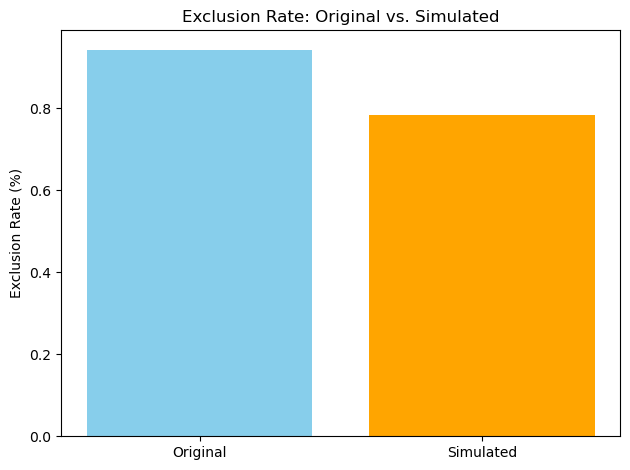

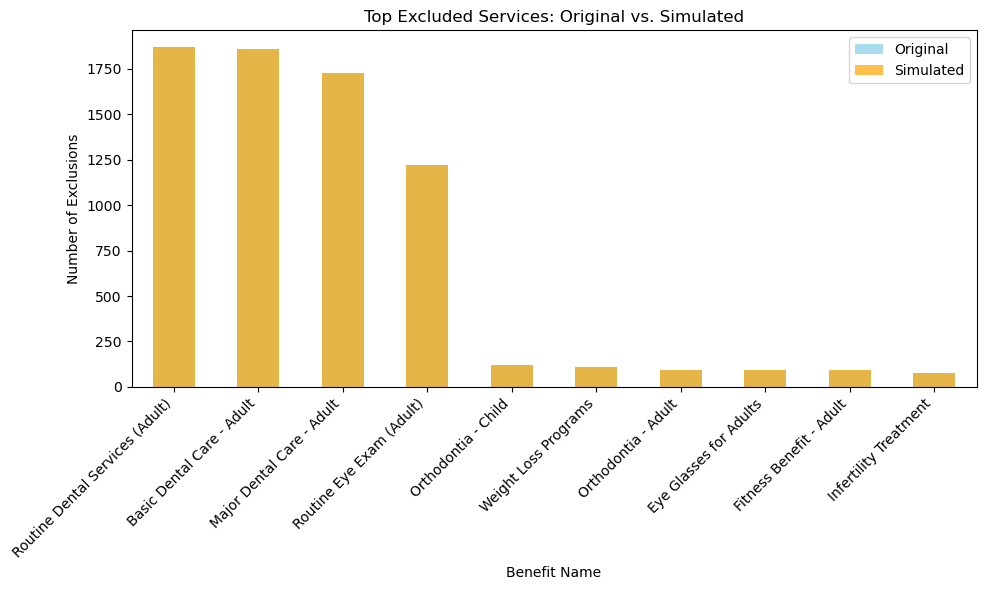

In [20]:
import matplotlib.pyplot as plt

# Visualize exclusion rate change
phases = ['Original', 'Simulated']
rates = [original_exclusion_rate, simulated_exclusion_rate]

plt.bar(phases, rates, color=['skyblue', 'orange'])
plt.title('Exclusion Rate: Original vs. Simulated')
plt.ylabel('Exclusion Rate (%)')
plt.tight_layout()
plt.show()

# Visualize top excluded services change
original_top_exclusions.plot(kind='bar', color='skyblue', alpha=0.7, label='Original', figsize=(10, 6))
simulated_top_exclusions.plot(kind='bar', color='orange', alpha=0.7, label='Simulated')
plt.title('Top Excluded Services: Original vs. Simulated')
plt.xlabel('Benefit Name')
plt.ylabel('Number of Exclusions')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Summary of Analysis and Recommendations
Key Insights:
Exclusion Rate:The simulated scenario shows a reduction in the exclusion rate compared to the original dataset, indicating the positive impact of adjustments like increasing LimitQty.

Top Excluded Services:
Dental Services: Routine, basic, and major dental care services dominate exclusions.
Vision Care: Routine eye exams are frequently excluded.
Orthodontia (Child): High exclusion rates suggest a need for coverage enhancements.

In [21]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Train an XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,      # Number of boosting rounds
    learning_rate=0.1,     # Step size shrinkage used to prevent overfitting
    max_depth=6,           # Maximum depth of a tree
    subsample=0.8,         # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 3: Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display evaluation metrics and confusion matrix
print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


XGBoost Model Evaluation:
Accuracy: 0.9977279507952173
Precision: 0.9382456140350878
Recall: 0.8127659574468085
F1-Score: 0.8710097719869707
Confusion Matrix:
 [[172559     88]
 [   308   1337]]


   Threshold  Accuracy  Precision    Recall  F1-Score
0        0.1  0.997579   0.906853  0.828571  0.865947
1        0.2  0.997739   0.924644  0.827964  0.873637
2        0.3  0.997797   0.930964  0.827964  0.876448
3        0.4  0.997785   0.930869  0.826748  0.875724
4        0.5  0.997728   0.938246  0.812766  0.871010
5        0.6  0.997711   0.941844  0.807295  0.869394
6        0.7  0.997671   0.944086  0.800608  0.866447
7        0.8  0.996850   0.979860  0.680243  0.803014


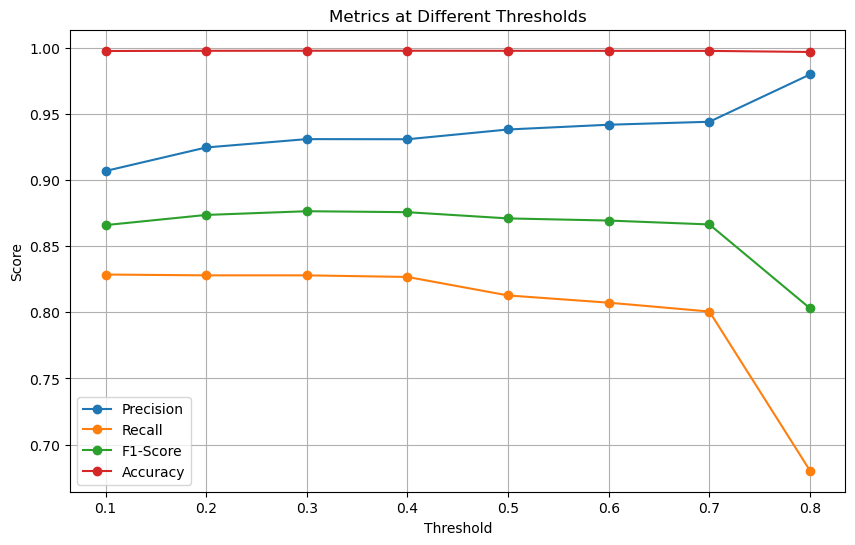

In [23]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 1: Get predicted probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 2: Test multiple thresholds
thresholds = np.arange(0.1, 0.9, 0.1)  # Test thresholds from 0.1 to 0.8 in steps of 0.1
results = []

for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    results.append({'Threshold': threshold, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

# Convert results to a DataFrame
import pandas as pd
threshold_results = pd.DataFrame(results)

# Display threshold results
print(threshold_results)

# Step 3: Plot the metrics vs. thresholds
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(threshold_results['Threshold'], threshold_results['Precision'], label='Precision', marker='o')
plt.plot(threshold_results['Threshold'], threshold_results['Recall'], label='Recall', marker='o')
plt.plot(threshold_results['Threshold'], threshold_results['F1-Score'], label='F1-Score', marker='o')
plt.plot(threshold_results['Threshold'], threshold_results['Accuracy'], label='Accuracy', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics at Different Thresholds')
plt.legend()
plt.grid()
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Select the threshold
selected_threshold = 0.4  # Change this based on your preference

# Step 2: Apply the threshold
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred_threshold = (y_probs >= selected_threshold).astype(int)  # Convert probabilities to binary predictions

# Step 3: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

# Step 4: Display metrics and confusion matrix
print("Re-Evaluated Performance with Threshold =", selected_threshold)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Re-Evaluated Performance with Threshold = 0.4
Accuracy: 0.9978
Precision: 0.9309
Recall: 0.8267
F1-Score: 0.8757
Confusion Matrix:
[[172546    101]
 [   285   1360]]


###feature importance analysis

Top 10 Features Influencing Predictions:
                                          Feature  Importance
600                                    IsEHB_Yes    0.157419
0                                       LimitQty    0.146277
560                            CoinsInnTier1_0.5    0.129204
151         BenefitName_Routine Eye Exam (Adult)    0.076806
150  BenefitName_Routine Dental Services (Adult)    0.051203
550                        CopayInnTier1_Unknown    0.041322
11         BenefitName_Basic Dental Care - Adult    0.040638
79         BenefitName_Major Dental Care - Adult    0.039378
138             BenefitName_Private-Duty Nursing    0.035873
599                        CoinsInnTier1_Unknown    0.027708


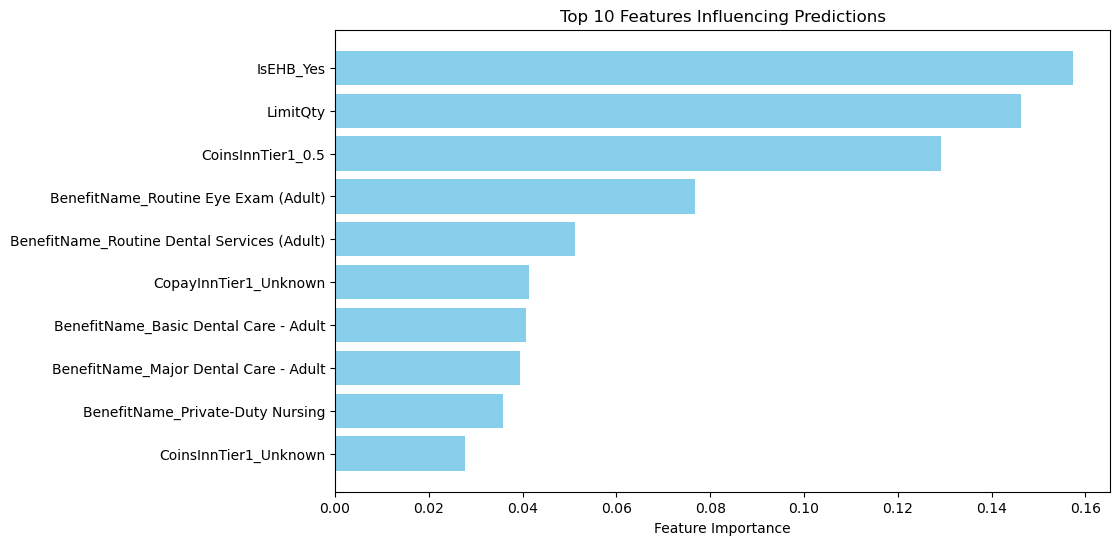

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
feature_importances = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Features Influencing Predictions:\n", importance_df.head(10))

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Predictions')
plt.xlabel('Feature Importance')
plt.show()


####Hypertunning

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Step 5: Convert to sparse matrices to save memory
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Step 6: Apply PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)  # Retain 100 components
X_train_pca = pca.fit_transform(X_train_sparse.toarray())
X_test_pca = pca.transform(X_test_sparse.toarray())

# Step 7: Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Reduce number of iterations for memory efficiency
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on PCA-transformed data
random_search.fit(X_train_pca, y_train)

# Best parameters and performance
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best F1 Score from Cross-Validation:", best_score)

# Step 8: Evaluate the tuned model on test data
best_xgb_model = random_search.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
conf_matrix = confusion_matrix(y_test, y_pred_tuned)

print("Tuned XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best F1 Score from Cross-Validation: 0.8897551944706997
Tuned XGBoost Model Evaluation:
Accuracy: 0.9975
Precision: 0.9261
Recall: 0.8000
F1-Score: 0.8584
Confusion Matrix:
[[172542    105]
 [   329   1316]]


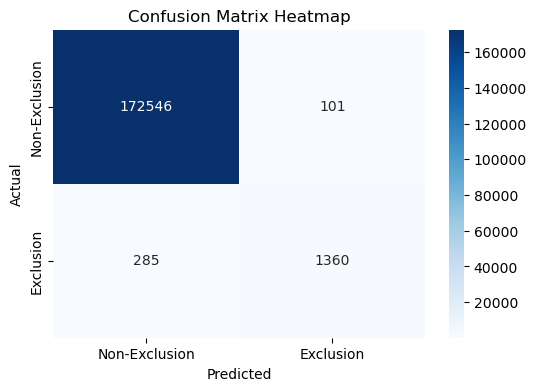

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Exclusion', 'Exclusion'], 
            yticklabels=['Non-Exclusion', 'Exclusion'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


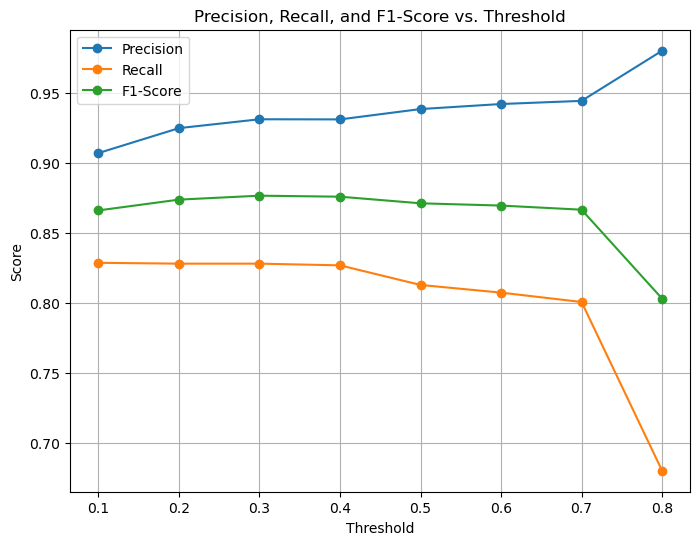

In [31]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute metrics for different thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
precisions, recalls, f1_scores = [], [], []

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# Plot Precision, Recall, and F1-Score
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


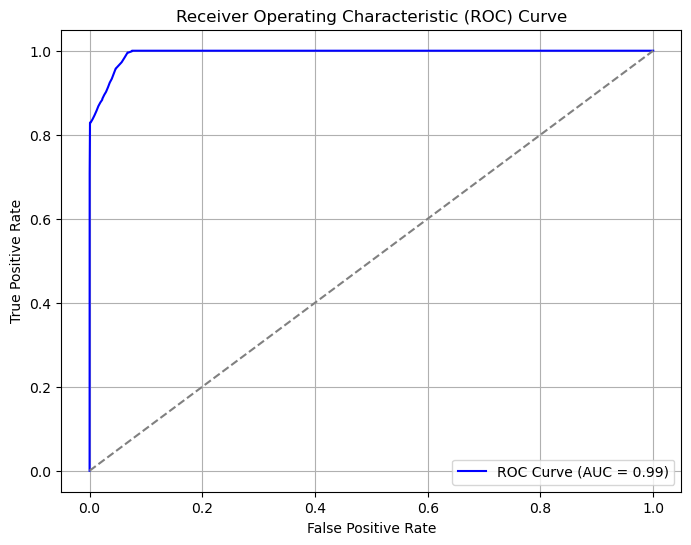

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


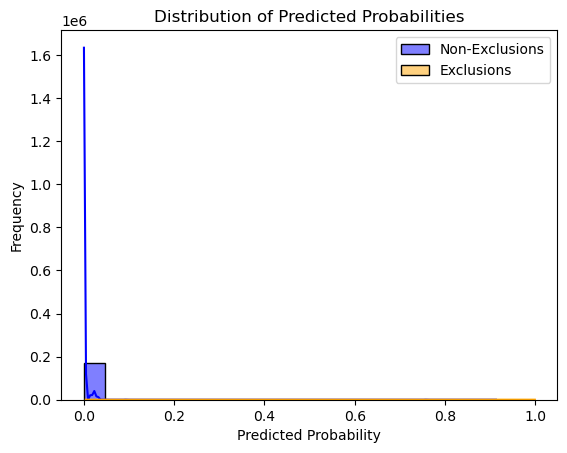

In [33]:
sns.histplot(y_probs[y_test == 0], bins=20, color='blue', label='Non-Exclusions', kde=True)
sns.histplot(y_probs[y_test == 1], bins=20, color='orange', label='Exclusions', kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
part2- target = 'IsExclFromOonMOOP ' 

In [45]:
data_updated=data

In [46]:
# Map the target column to binary values
data_updated['IsExclFromOonMOOP'] = data_updated['IsExclFromOonMOOP'].map({'Yes': 1, 'No': 0})

# Select features and target
features = ['BenefitName', 'CopayInnTier1', 'CoinsInnTier1', 'IsEHB', 'Exclusions', 'LimitQty']
target = 'IsExclFromOonMOOP'

# Subset the data
new_df_subset = data_updated[features + [target]]

# Handle missing values
# Replace NaN in numerical columns with median
numerical_columns = ['LimitQty']
for col in numerical_columns:
    new_df_subset[col].fillna(new_df_subset[col].median(), inplace=True)

# Replace NaN in categorical columns with "Unknown"
categorical_columns = ['BenefitName', 'CopayInnTier1', 'CoinsInnTier1', 'IsEHB', 'Exclusions']
for col in categorical_columns:
    new_df_subset[col].fillna('Unknown', inplace=True)

# Encode categorical variables using one-hot encoding
new_df_encoded = pd.get_dummies(new_df_subset, columns=categorical_columns, drop_first=True)

# Drop rows with missing target values
new_df_encoded = new_df_encoded.dropna(subset=[target])

# Split the data into features and target
X_new = new_df_encoded.drop(columns=[target])
y_new = new_df_encoded[target]

# Display shapes
X_new.shape, y_new.shape


C:\Users\ssuni\AppData\Local\Temp\ipykernel_30160\2024152529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subset[col].fillna(new_df_subset[col].median(), inplace=True)
C:\Users\ssuni\AppData\Local\Temp\ipykernel_30160\2024152529.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_subset[col].fillna('Unknown', inplace=True)


((871518, 871), (871518,))

Random Forest Classifier

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display metrics
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)


Random Forest Evaluation:
Accuracy: 0.7685
Precision: 0.7702
Recall: 0.4960
F1-Score: 0.6034
Confusion Matrix:
 [[103275   9156]
 [ 31187  30686]]


In [48]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display metrics
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print("Confusion Matrix:\n", conf_matrix_xgb)


XGBoost Evaluation:
Accuracy: 0.7360
Precision: 0.7909
Recall: 0.3483
F1-Score: 0.4836
Confusion Matrix:
 [[106735   5696]
 [ 40323  21550]]


Feature Importance

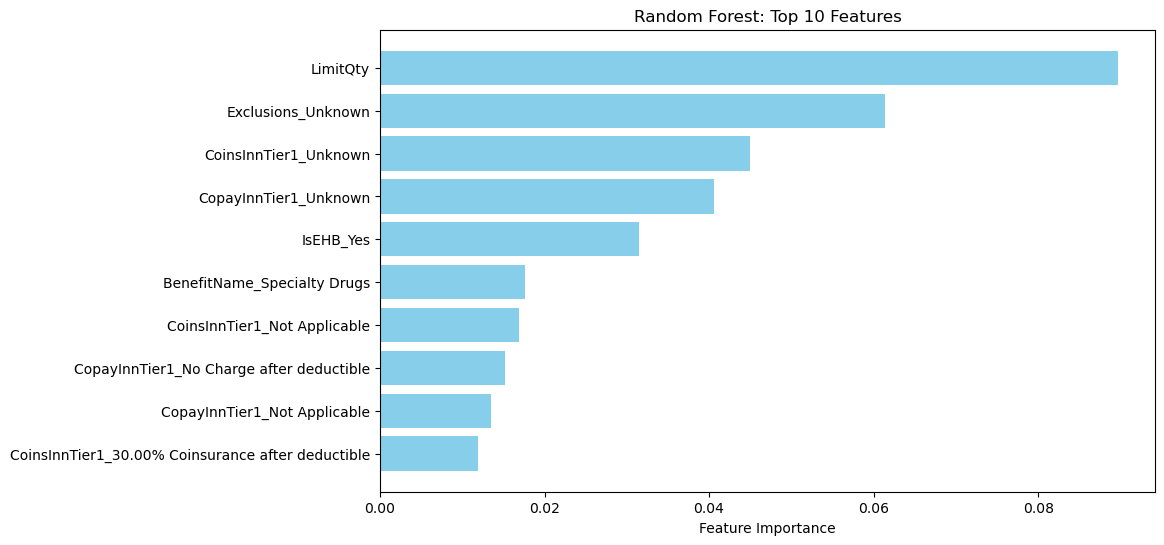

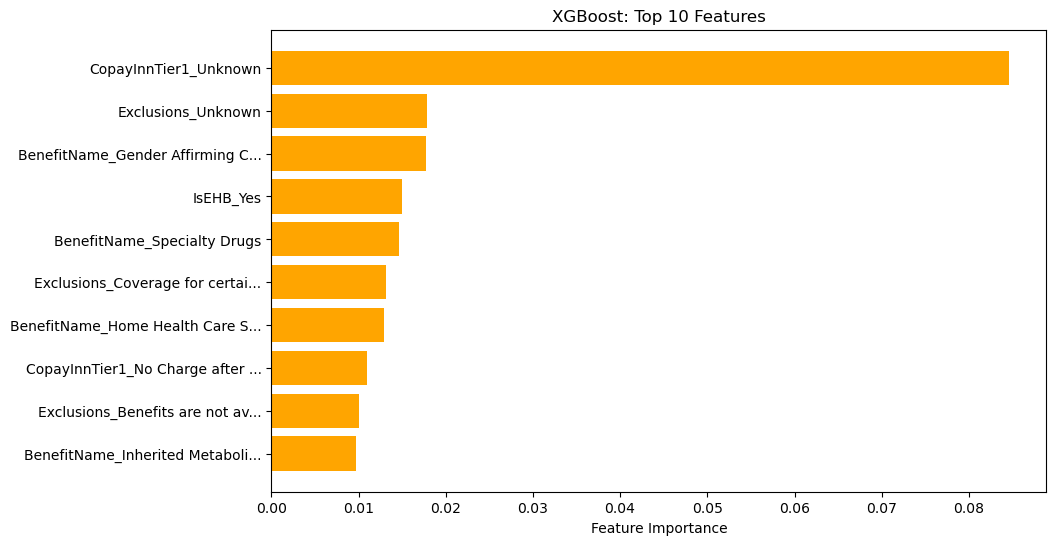

In [56]:
# Random Forest Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

feature_importances_rf = rf_model.feature_importances_
features = X_train.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df_rf['Feature'][:10], importance_df_rf['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Random Forest: Top 10 Features')
plt.xlabel('Feature Importance')
plt.show()


# Shorten feature names for readability
importance_df_xgb['Short Feature'] = importance_df_xgb['Feature'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)

# Plot the top 10 features with shortened names
plt.figure(figsize=(10, 6))
plt.barh(importance_df_xgb['Short Feature'][:10], importance_df_xgb['Importance'][:10], color='orange')
plt.gca().invert_yaxis()
plt.title('XGBoost: Top 10 Features')
plt.xlabel('Feature Importance')
plt.show()


Confusion Matrix Heatmap

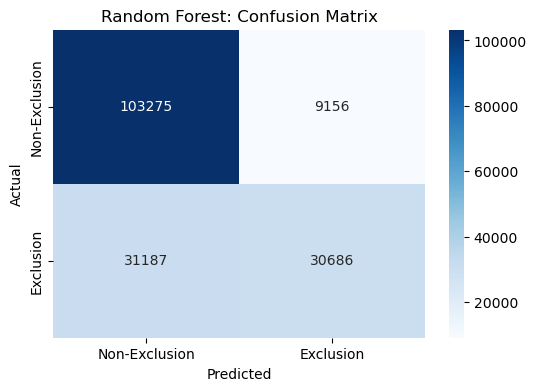

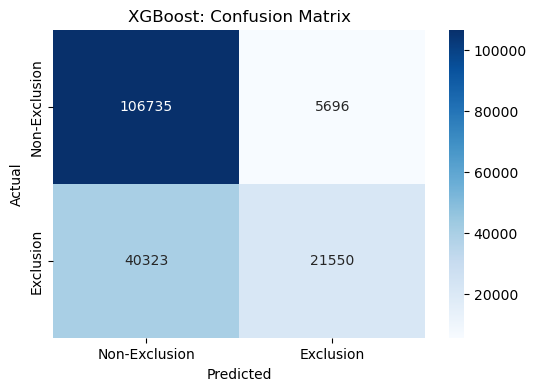

In [52]:
import seaborn as sns

# Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Exclusion', 'Exclusion'], 
            yticklabels=['Non-Exclusion', 'Exclusion'])
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Exclusion', 'Exclusion'], 
            yticklabels=['Non-Exclusion', 'Exclusion'])
plt.title('XGBoost: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Precision-Recall Curve

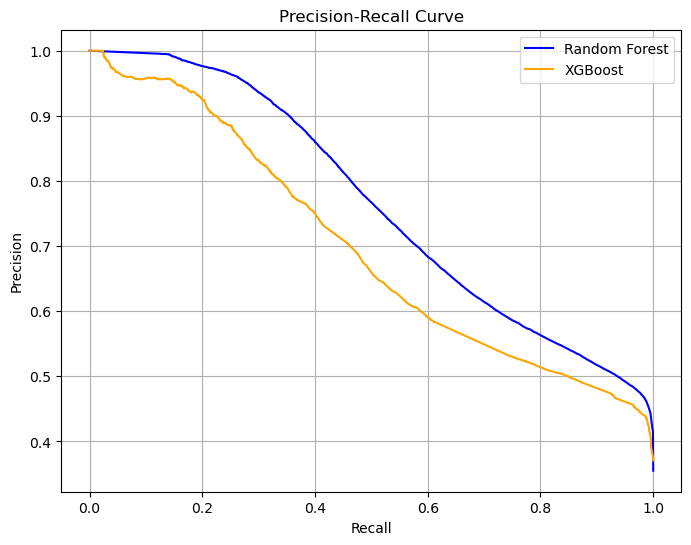

In [53]:
from sklearn.metrics import precision_recall_curve

# Random Forest Precision-Recall Curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# XGBoost Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label='Random Forest', color='blue')
plt.plot(recall_xgb, precision_xgb, label='XGBoost', color='orange')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()


ROC Curve

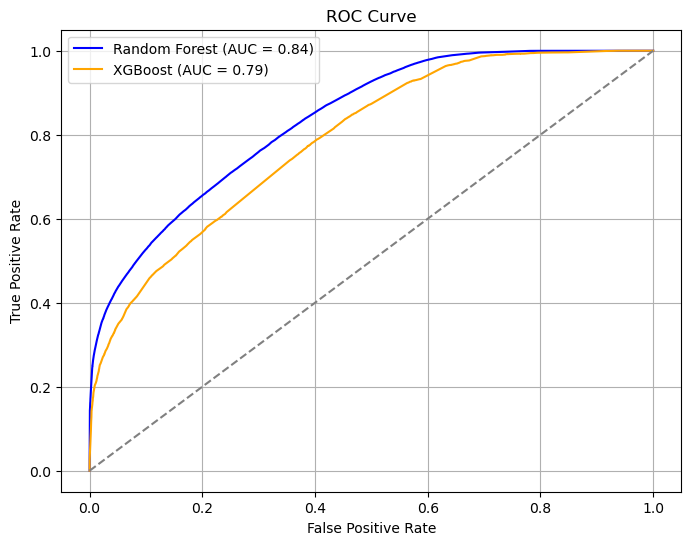

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Predicted Probability Distribution: Analyze the separation of predicted probabilities for different classes.

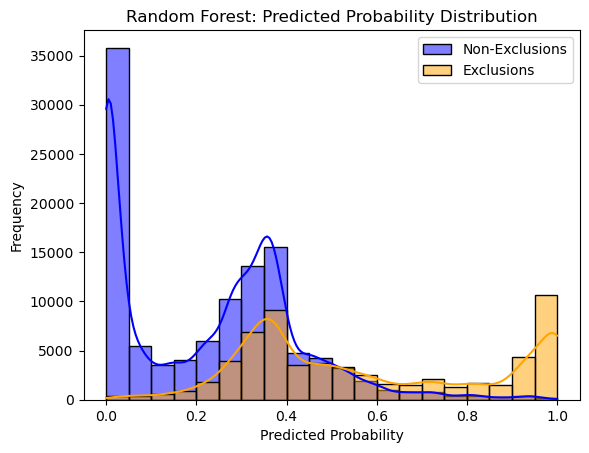

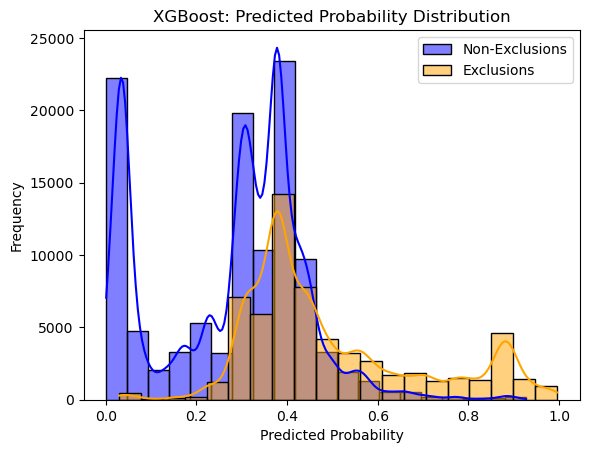

In [55]:
sns.histplot(rf_model.predict_proba(X_test)[:, 1][y_test == 0], bins=20, color='blue', label='Non-Exclusions', kde=True)
sns.histplot(rf_model.predict_proba(X_test)[:, 1][y_test == 1], bins=20, color='orange', label='Exclusions', kde=True)
plt.title('Random Forest: Predicted Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sns.histplot(xgb_model.predict_proba(X_test)[:, 1][y_test == 0], bins=20, color='blue', label='Non-Exclusions', kde=True)
sns.histplot(xgb_model.predict_proba(X_test)[:, 1][y_test == 1], bins=20, color='orange', label='Exclusions', kde=True)
plt.title('XGBoost: Predicted Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()
